In [ ]:
a = [1; 2; 3]
b = [4 5 6]
A = [1 2 3; 4 5 6]

In [ ]:
using LinearAlgebra
c = [1; 1; 1]
d = dot(a,c)

In [ ]:
using Pkg
Pkg.add("LinearAlgebra")

In [ ]:
function f(x,y)
    return 3x + 2y
end

In [ ]:
f(2,3)

In [ ]:
f(x,y) = 2x + 3y
f(3,2)

In [ ]:
using LinearAlgebra
cur_x = [-1.8;-1.6] #Starting Point
alpha = 0.01 #"Learning rate for the ML fans" BTW, this is how we comment in Julia: #
precision = 0.000000001
previous_step_size = 1.0
x_list = zeros(0)
y_list = zeros(0)

df(w) = 2*(w-1) #The gradient component of our function, we define this as a function, of course

while previous_step_size > precision #While loop, simple as well
    x_list = append!(x_list, cur_x[1])
    y_list = append!(y_list, cur_x[2])
    prev_x = cur_x
    cur_x -= alpha*df.(prev_x) #Here we need to include the dot "." after the function name in order to evaluate it for a vector
    previous_step_size = norm(cur_x - prev_x)
end

println("The local minimum occurs at $cur_x");

In [ ]:
y_list


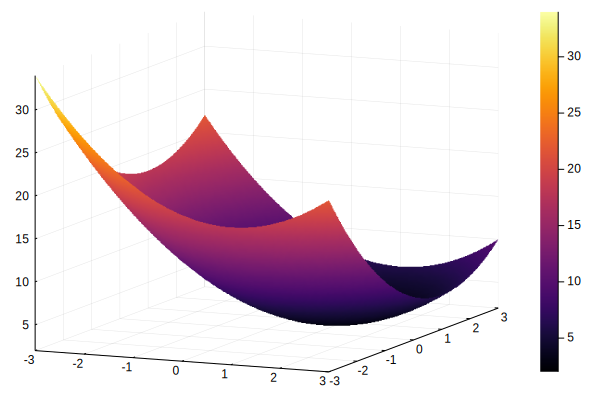

In [14]:
using Plots #This is Julia's basic Plot package
x=range(-3,stop=3,length=100) #This is equivalent to linspace in Python (Self-explanatory).
y=range(-3,stop=3,length=100)
f(x,y) = (x-1)^2 + (y-1)^2 + 2
plot(x,y,f,st=:surface)


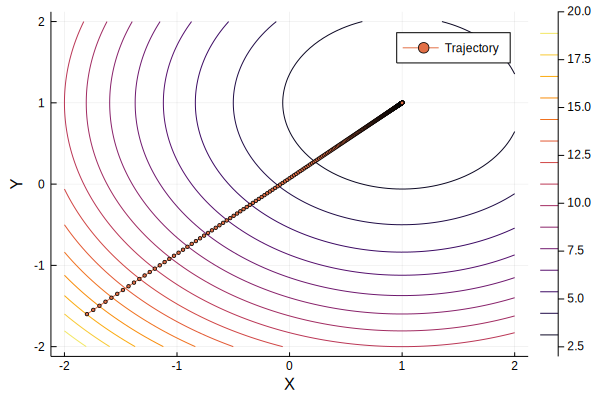

In [15]:
using Plots
x=range(-2,stop=2,length=100)
y=range(-2,stop=2,length=100)
f(x,y) = (x-1)^2 + (y-1)^2 + 2
plot(x,y,f,st=:contour) #Here the argument of st= is the only modification we make
plot!(x_list, y_list, marker =2, ylabel = "Y", xlabel = "X", label = "Trajectory")


In [17]:
using Pkg
Pkg.add("Optim")

  Updating registry at `C:\Users\18143\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [===>                                     ]  5.0 %=====>                                   ]  11.9 %========>                                ]  18.6 %                         ]  36.6 % [=====================>                   ]  51.4 % % %Fetching: [==============================>          ]  73.9 %>    ]  88.6 %Fetching: [====================================>    ]  89.8 %]  95.0 %96.1 %>]  98.7 % Resolving package versions...
  Updating `C:\Users\18143\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\18143\.julia\environments\v1.3\Manifest.toml`
 [no changes]


In [22]:
g(x) = (x[1]-1)^2 + (x[2]-1)^2 + 2 #We must write x in the argument and enter the variables as x[1], x[2] instead of x,y,...
using Optim
opt = Optim.optimize(g,[-1.8,-1.6])
println("optimal x =", opt.minimizer)
println("optimal f =", opt.minimum)

optimal x =[1.0000556510586145, 1.000036631806592]
optimal f =2.0000000044389297


In [24]:
Pkg.add("JuMP")

 Resolving package versions...
  Updating `C:\Users\18143\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\18143\.julia\environments\v1.3\Manifest.toml`
 [no changes]


In [34]:
using JuMP, Ipopt
my_model = Model(with_optimizer(Ipopt.Optimizer))

@variable(my_model, x[1:2])
@NLobjective(my_model, Min, (x[1]-1)^2 + (x[2]-1)^2 + 2)
@NLconstraint(my_model, x[1] + x[2] >= 0.5)
@NLconstraint(my_model, x[1] + x[2] <= 0.75)

JuMP.optimize!(my_model)

println("** Opt obj func = ", JuMP.objective_value(my_model))
println("** Opt sol = ", JuMP.value.(x))

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

In [35]:
pwd()

"C:\\Users\\18143"